In [1]:
# 使用简单numpy实现GCN
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

# 对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()


C:\Users\34330\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


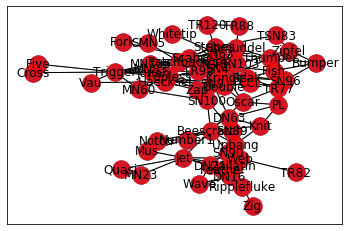

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [2]:
# 数据加载，构造图
G = nx.read_gml('dolphins.gml')
print(G)
#print(type(G))

# 可视化
plot_graph(G)
print(list(G.nodes()))
#print(G.nodes['MN23'])
#print(G.nodes)
#print(G.nodes[:,'value'])


In [3]:
# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
print(order)
A = to_numpy_matrix(G, nodelist=order)
#邻接矩阵
print('A=\n', A) 


['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
A=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [4]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
print('A_hat=\n', A_hat)


A_hat=
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [5]:
# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)


D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]
D_hat=
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [6]:
# 初始化权重, normal 正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1=\n', W_1)
print('W_2=\n', W_2)


W_1=
 [[-5.22738993e-01  1.50285837e+00 -8.98868437e-01  1.29373461e+00]
 [ 3.18513188e-01  4.33981037e-01 -5.12211856e-01 -1.27752582e+00]
 [-4.56515026e-01  6.02818997e-01  3.85943528e-01 -3.01792414e-01]
 [ 4.87460179e-01 -1.65725359e-01 -3.56219186e-01 -4.79414612e-01]
 [-1.51347946e-01 -1.00942655e-01 -3.92428137e-01 -2.94916500e-01]
 [ 1.24581938e+00 -1.60279383e+00 -7.39307064e-01 -3.25667489e-01]
 [-4.15519631e-02 -1.50609172e-01 -1.10613119e-01  2.42558509e-01]
 [ 3.71568119e-01  7.63051785e-01 -3.71137518e-01 -5.57410062e-01]
 [-4.24107427e-01 -2.03115029e-02  1.59401381e+00  1.38783100e-03]
 [-6.19534407e-01  8.41571391e-01  2.05772674e-01  3.70253889e-01]
 [-9.87400792e-01  9.09434268e-04  3.34379330e-01 -9.15587784e-01]
 [ 7.22890605e-01 -7.73821399e-01  2.10331887e+00  1.53190739e-01]
 [-1.43678281e+00 -7.50987006e-02  6.75788462e-01  2.25293962e-01]
 [ 1.08135549e+00 -1.40339398e+00 -1.17947103e+00 -5.32976220e-02]
 [ 1.06518773e+00 -2.24723587e-01 -1.10631652e+00 -9.680

In [7]:
# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return(abs(x)+x)/2

# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
	return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output=\n', output)

output=
 [[0.10214102 0.10282382]
 [0.         0.        ]
 [0.17228714 0.200196  ]
 [0.         0.        ]
 [0.2206268  0.11340374]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.09338244 0.05868442]
 [0.16068891 0.0564722 ]
 [0.13158324 0.22884833]
 [0.         0.        ]
 [0.         0.        ]
 [0.02037696 0.02667915]
 [0.         0.02624222]
 [0.         0.        ]
 [0.14753267 0.16735684]
 [0.         0.        ]
 [0.         0.0074325 ]
 [0.1149876  0.16238039]
 [0.19816902 0.        ]
 [0.06442805 0.12654571]
 [0.14463325 0.17088067]
 [0.011157   0.01028868]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.13401618 0.16667358]
 [0.16947793 0.        ]
 [0.         0.        ]
 [0.14186876 0.26087326]
 [0.         0.        ]
 [0.02144036 0.13246021]
 [0.21603336 0.2152224 ]
 [0.         0.        ]
 [0.         0.00358727]
 [0.         0. 

In [8]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)


feature_representations=
 {'Beak': array([0.10214102, 0.10282382]), 'Beescratch': array([0., 0.]), 'Bumper': array([0.17228714, 0.200196  ]), 'CCL': array([0., 0.]), 'Cross': array([0.2206268 , 0.11340374]), 'DN16': array([0., 0.]), 'DN21': array([0., 0.]), 'DN63': array([0., 0.]), 'Double': array([0., 0.]), 'Feather': array([0., 0.]), 'Fish': array([0.09338244, 0.05868442]), 'Five': array([0.16068891, 0.0564722 ]), 'Fork': array([0.13158324, 0.22884833]), 'Gallatin': array([0., 0.]), 'Grin': array([0., 0.]), 'Haecksel': array([0.02037696, 0.02667915]), 'Hook': array([0.        , 0.02624222]), 'Jet': array([0., 0.]), 'Jonah': array([0.14753267, 0.16735684]), 'Knit': array([0., 0.]), 'Kringel': array([0.       , 0.0074325]), 'MN105': array([0.1149876 , 0.16238039]), 'MN23': array([0.19816902, 0.        ]), 'MN60': array([0.06442805, 0.12654571]), 'MN83': array([0.14463325, 0.17088067]), 'Mus': array([0.011157  , 0.01028868]), 'Notch': array([0., 0.]), 'Number1': array([0., 0.]), 'Oscar'

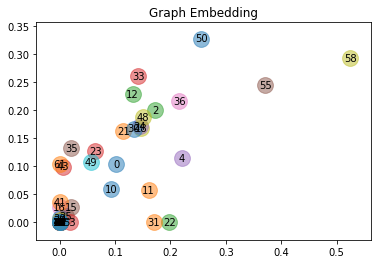

In [9]:

# 绘制output，节点GCN embedding可视化
def plot_node(output, title):
    for i in range(len(nodes)):
        node_name = nodes[i]
        #value = G.nodes[node_name]['value']
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.title(title)
    plt.show()
plot_node(output, 'Graph Embedding')

output(去掉relu)=
: [[ 0.27357503  0.28592553]
 [-0.59019077 -0.22309779]
 [ 0.6269899   0.82788559]
 [-0.52606575 -0.11273976]
 [ 0.40688447  0.24072843]
 [-1.21362138 -1.00593888]
 [-1.01257559 -0.79576339]
 [-0.84506375 -0.512276  ]
 [-0.32937836  0.02431711]
 [-0.87613265 -0.68901605]
 [ 0.19051821  0.31618978]
 [ 0.40229865  0.18465345]
 [ 1.09481331  1.1361947 ]
 [-0.97308125 -0.73199569]
 [-0.19727565  0.2035941 ]
 [ 0.30586174  0.35533578]
 [-0.19332193  0.2686298 ]
 [ 0.05844471 -0.14216692]
 [ 0.20160411  0.42143877]
 [-1.27049372 -0.87527453]
 [-0.08844548  0.163731  ]
 [ 0.10941476  0.50991487]
 [ 1.1442616   0.38025078]
 [ 0.1368374   0.39935497]
 [ 0.21872706  0.37206683]
 [ 0.2318278   0.29005467]
 [ 0.01039147  0.16081428]
 [-0.20010436 -0.02735474]
 [-0.40512252 -0.32425372]
 [-0.38789723 -0.36215464]
 [ 0.3128583   0.59128391]
 [ 0.63233404  0.13365495]
 [-0.43035587 -0.58867535]
 [ 0.15538073  0.80584679]
 [-0.62381858 -0.06733913]
 [ 0.15217631  0.60358061]
 [ 0.41253

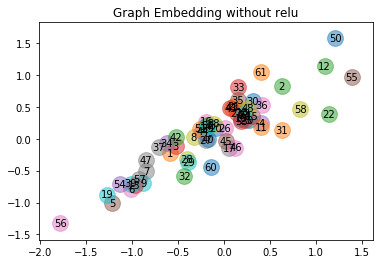

In [10]:
# 尝试去掉激活函数relu
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print("output(去掉relu)=\n:",output)

plot_node(output, 'Graph Embedding without relu')
